<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Victor Faraggi

### **Link de repositorio de GitHub:** `https://github.com/stepp1/MDS7202-2021`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

#Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
# !pip install --upgrade plotly
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# UMAP
# !pip install umap-learn

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [3]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


In [4]:
df_players.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object')

In [5]:
df_players.describe()

,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
count,17588.00000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,...,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,181.10547,75.253355,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,45.565499,47.441096,...,63.206732,64.918524,52.393109,55.581192,45.157607,47.403173,47.181146,43.383443,49.165738,43.275586
std,6.67516,6.897948,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,21.515179,21.827815,...,14.618163,11.430807,17.473703,17.600155,19.374428,19.211887,18.464396,17.701903,15.871735,17.710839
min,155.00000,48.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,...,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000
25%,176.00000,70.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,...,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000
50%,181.00000,75.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,...,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000
75%,186.00000,80.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,...,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000
max,207.00000,110.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,...,96.000000,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000


In [6]:
df_players.describe(include = 'object')

,Name,Nationality,National_Position,Club_Position,Preffered_Foot,Work_Rate
count,17588,17588,1075,17587,17588,17588
unique,17341,160,27,29,2,9
top,Felipe,England,Sub,Sub,Right,Medium / Medium
freq,6,1618,556,7492,13494,9897


In [7]:
df_players.isna().sum()

Name                     0
Nationality              0
National_Position    16513
Club_Position            1
Height                   0
Weight                   0
Preffered_Foot           0
Age                      0
Work_Rate                0
Weak_foot                0
Skill_Moves              0
Ball_Control             0
Dribbling                0
Marking                  0
Sliding_Tackle           0
Standing_Tackle          0
Aggression               0
Reactions                0
Interceptions            0
Vision                   0
Composure                0
Crossing                 0
Short_Pass               0
Long_Pass                0
Acceleration             0
Speed                    0
Stamina                  0
Strength                 0
Balance                  0
Agility                  0
Jumping                  0
Heading                  0
Shot_Power               0
Finishing                0
Long_Shots               0
Curve                    0
Freekick_Accuracy        0
P

## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [8]:
### Código aquí ###
from typing import Union

def label_encoder(target_values: Union[pd.Series, np.array]):
    uniq_values = np.unique(target_values.astype(str))
    mapping = {cat: code for cat, code in zip(uniq_values, range(len(uniq_values)))}
    encoded_labels = np.vectorize(mapping.get)(target_values.astype(str))
    return encoded_labels


def create_labels(df: pd.DataFrame, target_col: str) -> pd.DataFrame:
    """Encode target column with labels between 0 and n_classes-1."""
    df[f"{target_col}_labels"] = label_encoder(df[target_col])
    return df
    
df_players = create_labels(df_players, "National_Position")
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,National_Position_labels
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,12
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,23
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,13
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,12
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,27
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,27
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,27
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,27


### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="http://vignette3.wikia.nocookie.net/inciclopedia/images/c/cd/Patada_Medel_Messi.gif/revision/latest?cb=20150705215005" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

From the Report, we can categorize the features according to their distributions:

* Gaussian with a long/heavy tail :

`["Ball_Control", "Dribbling",  "Aggression", "Vision", "Crossing", "Short_Pass", "Long_Pass", "Acceleration", "Speed", "Stamina", "Agility", "Shot_Power", "Penalties"]`
     
* Two Gaussians:

`["Marking", "Sliding_Tackle", "Standing_Tackle", "Interceptions", "Heading"]`
    
* Gaussian-like:

`["Reactions", "Composure", "Strength", "Balance", "Jumping"]`

* Uniform: 

`["Finishing", "Long_Shots", "Curve", "Freekick_Accuracy", "Volleys"]`


Notes:
- `Jumping`: no correlation
- `Heading`: first gaussian might be just outliers


In [9]:
### Código aquí ###
feats_clean = ["Height", "Weight", "Reactions", "Composure", "Strength", "Balance", "Jumping"]

feats_outlier = ["Ball_Control", "Dribbling",  "Aggression", "Vision", \
                 "Crossing", "Short_Pass", "Long_Pass", "Acceleration", \
                 "Speed", "Stamina", "Agility", "Shot_Power", "Penalties"]

feats_uniform = ["Finishing", "Long_Shots", "Curve", "Freekick_Accuracy", "Volleys"]

feats_twomeans = [
    "Marking", 
    "Sliding_Tackle", # only one tackle due to high correlation
    "Interceptions", 
    "Heading"
]

feats_categorical = ["Work_Rate", "Preffered_Foot"]
feats_categorical_num = ["Weak_foot", "Skill_Moves"]


preprocess_cols = ColumnTransformer(
    transformers=[
        ("clean_scaler", Pipeline([
            ("minmax", MinMaxScaler()),
            ("standarize", StandardScaler())
        ]), feats_clean),
        ("outlier_scaler", PowerTransformer(), feats_outlier + feats_twomeans + feats_uniform),
        ("encoder_cat", OneHotEncoder(), feats_categorical + feats_categorical_num)
])

#### Justificación:

Para las columnas *más limpias* (gaussianas sin outliers) se aplica un `Pipeline` de escalamiento. Primero, se llevan los valores a un rango entre `[0,1]` con un `MinMaxScaler` y, luego, se estandariza a una distribución normal con `StandardScaler`. 

Además, se aplica `PowerTransformer` a las columnas que tienen outliers y a los que tienen dos gaussianas ya que este método es robusto al escalar estos tipos de datos. Este último método busca *gaussinizar* (media cero y varianza unitaria) las variables para estabilizar la varianza y minimizar skewness.  

Finalmente, para las variables categoricas, se aplica `OneHotEncoder`para poder usarlas obejtivo en los métodos de clasificación.

In [10]:
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

seed = 84

# classification:
# 17588 observations => SVC 
# No text Data => Knn Clf
# If the previous methods don't work => Ensemble Methods: RandomForest, AdaBoost, GradientBoost or SVC

def make_clf_pipes(): 
    # first pipeline
    svc = Pipeline([
        ("preprocess", preprocess_cols),
        ("clf", SVC(random_state=seed))
    ])

    # second pipeline
    knn = Pipeline([
        ("preprocess", preprocess_cols),
        ("clf", KNeighborsClassifier())
    ])

    # third pipeline
    rfc = Pipeline([
        ("preprocess", preprocess_cols),
        ("clf", RandomForestClassifier(random_state=seed))
    ])


    clf_pipes = [
        ("svc", svc),
        ("knn", knn),
        ("rfc", rfc)
    ]
    
    return clf_pipes

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [11]:
r2_score?

Object `r2_score` not found.


In [41]:
from typing import List, Callable, Dict, Tuple

from time import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score, r2_score
from scipy.stats import spearmanr


def make_train_test(
    X_df: pd.DataFrame, 
    y_df: pd.DataFrame,
    kind: str = "clf"
) -> dict[str,Tuple[np.array, np.array]]:
    """Creates a dictionary with train a test arrays from the given dataframes."""
    if kind == "clf":
        y_enc = LabelEncoder()
        y = y_enc.fit_transform(y_df.to_numpy().ravel())
    elif kind == "reg":
        y_enc = StandardScaler()
        y = y_enc.fit_transform(y_df.to_numpy())

    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2)
    
    train_test_d = {
        "train": (X_train, y_train.ravel()),
        "test": (X_test, y_test.ravel())
    }
    
    return train_test_d, y_enc

def clf_metrics(y_test:np.ndarray, y_pred:np.ndarray, labels: List[Union[str,int]]):
    # accuracy, precision, f1-score
    print(f"{classification_report(y_test, y_pred)}")
    
    print(f"Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()
    print("=====\n")
    
def reg_metrics(y_test:np.ndarray, y_pred:np.ndarray):
    print(f"\nR2 score:\t {r2_score(y_test, y_pred)}")
    print(f"Spearman rho:\t {spearmanr(y_test, y_pred)}")
    print("=====\n")


def train_pipes(
    train_test: dict[str,Tuple[np.array, np.array]], 
    model_pipes: List[Tuple[str, Pipeline]]
):
    """Creates and trains pipelines with the train arrays from train_test_d."""
    
    X_train, y_train = train_test["train"]
    
    for model_name, model in model_pipes:
        print(f"Training: {model_name}")
        start = time()
        model.fit(X_train, y_train)
        total = time() - start
        print(f"Took {total} (s)")
    print("===========\n")
    return model_pipes
    
def test_pipes(
    train_test: dict[str,Tuple[np.array, np.array]], 
    model_pipes: List[Pipeline],
    kind: str = "clf",
):
    """Tests classification or regression pipelines with the test arrays from train_test_d."""                                                                                             
    X_test, y_test = train_test["test"]
    
    for model_name, model in model_pipes:
        y_pred = model.predict(X_test)
        print(f"Metrics for {model_name}:")
        if kind == "clf":
            clf_metrics(y_test, y_pred, model.classes_)
            
        elif kind == "reg":
            reg_metrics(y_test, y_pred)
    print("===========\n")
    return model_pipes

Training: svc
Took 13.759923458099365 (s)
Training: knn
Took 0.6109356880187988 (s)
Training: rfc
Took 7.211576700210571 (s)
Metrics for svc:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.95      1.00      0.97    

/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


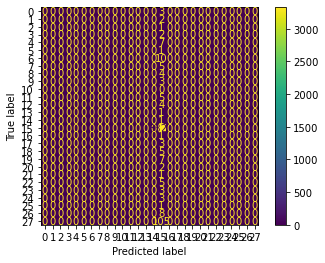

=====

Metrics for knn:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.95      1.00      0.97      3325
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
   

/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


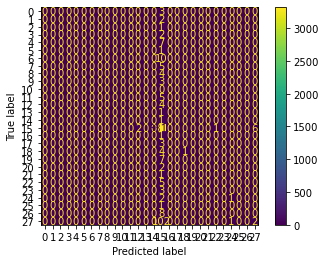

=====

Metrics for rfc:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.95      1.00      0.97      3325
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         3
   

/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/step/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


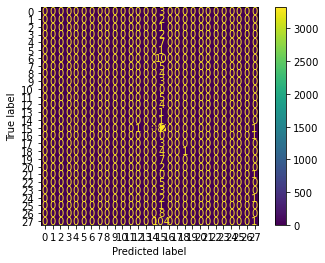

=====



In [13]:
X_cols_num = feats_clean + feats_outlier + feats_twomeans + feats_uniform
X_cols_cat = feats_categorical + feats_categorical_num 
y_cols = ["National_Position"]

# we assume that nans are due to not being selected to play on the National Team
X_df, y_df = df_players[X_cols_num + X_cols_cat], df_players[y_cols].National_Position.fillna('NO_POS')
                                                                                              
train_test_d, y_enc = make_train_test(X_df, y_df)

clf_pipes = make_clf_pipes()

clf_pipes = train_pipes(train_test_d, clf_pipes)  

clf_pipes = test_pipes(train_test_d, clf_pipes, kind="clf")

**Respuesta**:


No se obtienen resultados aceptables al querer predecir la variable `National_Position`. 

Esto se debe a que los clasificadores sobreajustan a las clases mayoritarias, la que en este caso corresponde a jugadores que no son seleccionados y los `SUB`. Esto se puede notar en métricas cómo `Precision` o `Recall` que ni siquiera pueden ser calculadas correctamente debido que no se realiza ninguna predicción para algunas clases (*warning de sklearn* y visible en matriz de confusión).

Para poder resolver este problema, existen usualmente tres posibles caminos. 

- El primero, que se utiliza generalmente en redes neuronales, es darle un peso diferente a cada clase en la función de pérdida. Con esto, es posible darle *mayor importancia* a predecir clases que esten representadas con menos observaciones. El problema con este camino es que no resulta fácil traducir esta importancia en estos métodos más tradicionales. 

- La segunda posible solución es samplear más observaciones de una clase que este subrepresentada y menos de las clases que están sobrerepresentadas.

- La tercera solución es la más tradicional y la que siempre tiende a obtener mejores resultados: obtener más observaciones de las clases subrepresentadas.

#### Bonus:
Ahora que lo pienso no sé si pedía hacer esta clasificación multiclase o una clasificación entre selecciona o no seleccionado. Haré esta segunda tarea abajo pero sólo comentaré brevemente.


En esta situación, los clasificadores obtienen bajos niveles en recall (y consecuentemente F1) para la segunda clase,`SEL`. Esto se debe nuevamente al sobreajuste a la clase mayoritaria, `NO_SEL` la cuál tiene más de diez veces la cantidad de observaciones. Así, los clasificadores predicen una gran cantidad de falsos positivos.

Training: svc
Took 8.274420499801636 (s)
Training: knn
Took 0.626946210861206 (s)
Training: rfc
Took 4.88423752784729 (s)
Metrics for svc:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      3285
           1       1.00      0.00      0.01       233

    accuracy                           0.93      3518
   macro avg       0.97      0.50      0.49      3518
weighted avg       0.94      0.93      0.90      3518

Confusion Matrix:


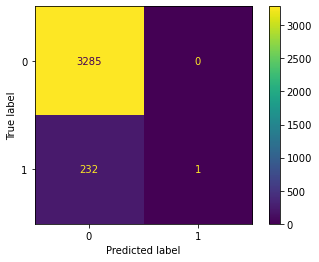

=====

Metrics for knn:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3285
           1       0.40      0.09      0.15       233

    accuracy                           0.93      3518
   macro avg       0.67      0.54      0.56      3518
weighted avg       0.90      0.93      0.91      3518

Confusion Matrix:


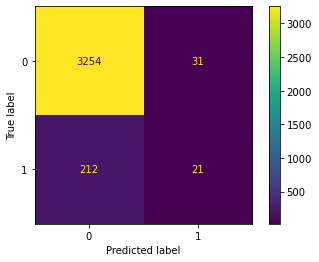

=====

Metrics for rfc:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3285
           1       0.60      0.08      0.14       233

    accuracy                           0.94      3518
   macro avg       0.77      0.54      0.55      3518
weighted avg       0.92      0.94      0.91      3518

Confusion Matrix:


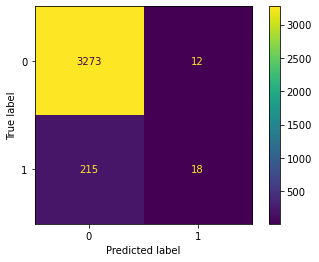

=====



In [14]:
X_cols_num = feats_clean + feats_outlier + feats_twomeans + feats_uniform
X_cols_cat = feats_categorical + feats_categorical_num 
y_cols = ["National_Position"]

# we assume that nans are due to not being selected to play on the National Team
X_df, y_df = df_players[X_cols_num + X_cols_cat], df_players[y_cols].National_Position.fillna('NO_SEL')

# replace every position that isn't NO_SEL with SEL
y_df = y_df.str.replace("^(?!.*NO_SEL).*", "SEL", regex=True)

train_test_d, y_enc = make_train_test(X_df, y_df)

clf_pipes = make_clf_pipes()

clf_pipes = train_pipes(train_test_d, clf_pipes)  

clf_pipes = test_pipes(train_test_d, clf_pipes, kind="clf")

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [15]:
### Código aquí ###
def group_positions(df: pd.DataFrame) -> pd.DataFrame:
    # drop Sub and Res
    df = df.copy()
    sub_res_df = df[(df.Club_Position.str.contains("Sub") | df.Club_Position.str.contains("Res"))]
    df = df.drop(sub_res_df.index) 

    new_to_olds = {
        "ataque" : ['ST', 'CF'],
        "central_ataque" : ['RW', 'CAM', 'LW'],
        "central" : ['RM', 'CM', 'LM'],
        "central_defensa" : ['RWB', 'CDM', 'LWB'],
        "defensa" : ['RB', 'CB', 'LB'],
        "arquero" : ['GK']
    }
    
    old_to_new = {old: new for new in new_to_olds.keys() for old in new_to_olds[new]}
    
    
    apply_mapping = lambda position : old_to_new.get(position, None)
    df.Club_Position =  df.Club_Position.apply(apply_mapping) 
    # estaba intentandolo con str.replace pero no me funcionaba unu
    return df

df_positions = group_positions(df_players)
df_positions = df_positions[~df_positions.Club_Position.isna()] # drop 1 nan
df_positions.groupby("Club_Position")["Name"].count()

Club_Position
arquero             632
ataque              430
central             907
central_ataque      581
central_defensa     209
defensa            1180
Name: Name, dtype: int64

In [16]:
X_cols_num = feats_clean + feats_outlier + feats_twomeans + feats_uniform
X_cols_cat = feats_categorical + feats_categorical_num 
y_cols = ["Club_Position"]

# we assume that nans are due to not being selected to play on the National Team
X_df, y_df = df_positions[X_cols_num + X_cols_cat], df_positions[y_cols]

Training: svc
Took 0.5378382205963135 (s)
Training: knn
Took 0.13915157318115234 (s)
Training: rfc
Took 1.0197081565856934 (s)
Metrics for svc:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       0.78      0.89      0.83        70
           2       0.58      0.67      0.62       189
           3       0.57      0.29      0.38       131
           4       0.53      0.22      0.31        46
           5       0.79      0.98      0.88       231

    accuracy                           0.74       788
   macro avg       0.71      0.67      0.67       788
weighted avg       0.72      0.74      0.71       788

Confusion Matrix:


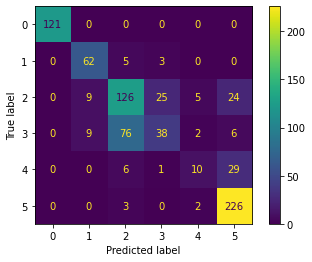

=====

Metrics for knn:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       0.65      0.83      0.73        70
           2       0.56      0.61      0.58       189
           3       0.46      0.24      0.31       131
           4       0.24      0.11      0.15        46
           5       0.76      0.93      0.84       231

    accuracy                           0.69       788
   macro avg       0.61      0.62      0.60       788
weighted avg       0.66      0.69      0.66       788

Confusion Matrix:


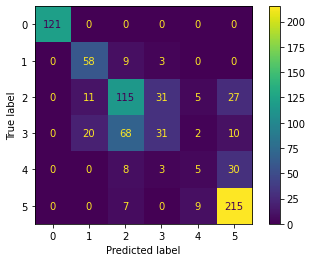

=====

Metrics for rfc:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       0.75      0.86      0.80        70
           2       0.59      0.67      0.63       189
           3       0.53      0.27      0.36       131
           4       0.54      0.15      0.24        46
           5       0.78      0.99      0.87       231

    accuracy                           0.73       788
   macro avg       0.70      0.66      0.65       788
weighted avg       0.71      0.73      0.70       788

Confusion Matrix:


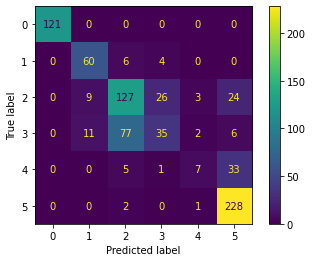

=====



In [17]:
train_test_d, y_enc = make_train_test(X_df, y_df)

clf_pipes = make_clf_pipes()

clf_pipes = train_pipes(train_test_d, clf_pipes)  

clf_pipes = test_pipes(train_test_d, clf_pipes, kind="clf")

**Respuesta**:


En este caso, los clasificadores claramente obtienen mejores resultados para las diferentes clases. Sin embargo, es posible seguir notando cómo tienden a no predecir correctamente las clases más subrepresentadas, `central_defensa`, y `central_ataque`. Dado lo anterior, se obtienen malos niveles de `precision` y de `recall` para dichas clases. Así, queda claro que no es suficiente tomar el `accuracy` cómo única métrica. 


## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

In [18]:
### Código aquí ###
df_salarios = pd.read_csv("salarios.csv", index_col=0)

df_salarios.columns = ["Name"] + list(df_salarios.columns[1:])
df_salarios.info()
df_salarios

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 1528 to 1002
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           2534 non-null   object 
 1   Weekly Salary  2534 non-null   float64
dtypes: float64(1), object(1)
memory usage: 59.4+ KB


,Name,Weekly Salary
1528,Lionel Messi,1538905.0
1006,Cristiano Ronaldo,1248536.0
1529,Antoine Griezmann,997032.0
2004,Neymar,797726.0
1530,Gareth Bale,607706.0
...,...,...
1527,Simone Ghidotti,283.0
2539,Valentin Gendrey,100.0
1001,John Yeboah,70.0
1000,Antonis Aidonis,70.0


In [19]:
# Justification:
# Less than 100k samples and only feature 
# ==> Ridge, SVR and Ensemble Regressors

from sklearn.svm import SVR 
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor 

def make_reg_pipes(): 
    # first pipeline
    svr = Pipeline([
        ("preprocess", preprocess_cols),
        ("reg", SVR())
    ])

    # second pipeline
    ridge = Pipeline([
        ("preprocess", preprocess_cols),
        ("reg", Ridge())
    ])

    # third pipeline
    rf = Pipeline([
        ("preprocess", preprocess_cols),
        ("reg", RandomForestRegressor(random_state=seed))
    ])


    reg_pipes = [
        ("svr", svr),
        ("ridge", ridge),
        ("rf", rf)
    ]
    
    return reg_pipes

In [42]:
train_test_d, y_enc = make_train_test(X_df, y_df, kind="reg")

reg_pipes = make_reg_pipes()

reg_pipes = train_pipes(train_test_d, reg_pipes)  

reg_pipes = test_pipes(train_test_d, reg_pipes, kind="reg")

Training: svr
Took 0.3767855167388916 (s)
Training: ridge
Took 0.1005856990814209 (s)
Training: rf
Took 4.306115627288818 (s)

Metrics for svr:

R2 score:	 0.44273216025744644
Spearman rho:	 SpearmanrResult(correlation=0.7347022372391936, pvalue=1.1470088152213094e-64)
=====

Metrics for ridge:

R2 score:	 0.34402660549613584
Spearman rho:	 SpearmanrResult(correlation=0.7112086006757835, pvalue=6.703065359349936e-59)
=====

Metrics for rf:

R2 score:	 0.5195445453319049
Spearman rho:	 SpearmanrResult(correlation=0.7188695616400185, pvalue=1.0249308116684113e-60)
=====




**Respuesta**:


* El score $R^2$ corresponde al coeficiente de determinación entre la variable dependiente (el *target*) y las independientes (las *features*). Es posible interpretar este coeficiente desde diferentes perspectivas (que incluso dependen de cómo sea calculado) pero, en pocas palabras, este coeficiente mide el grado de correlación entre la predicción y el valor real. 

    La forma en que la librería scikit-learn calcula proviene del grado de varianza explicada por los residuos entre las predicciones y los valores reales. Es decir, el coeficiente nos permite medir la calidad de ajuste del regresor a los datos. En otras palabras, es una forma de medir que tan bien se ajusta el modelo a la dispersión -- que es similar a la distribución pero no es una traducción literal --.
    
    Otra forma de calcularlo es calcular el cuadrado del coeficiente de correlación de Spearson. No se entrará en detalles de esta perspectiva pero se incluye el valor de este coeficiente para notar que si bien los resultados son similares, estos no son exactamente iguales.
    
* Con respecto a cómo mejorar los datos, se pueden realizar dos observaciones. Por un lado, obtener más datos siempre mejorará la calidad de los modelos ya que, teóricamente, con datos infinitos estos siempre se pueden ajustar a ellos. Por otro lado, los datos que estamos utilizando rompen un supuesto principal de los modelos: las variables independientes están fuertemente correlacionadas entre ellas. Por esto, puede ser ventajoso, eliminar variables o reducir la dimensionalidad a través de un método como PCA, y luego, incluir nuevas características que no estén correlacionadas. 
   
* Por último, es importante notar que el $R^2$ siempre mejorará al aumentar más datos o más características sean o no más informativas para el modelo. Por esto, es necesario observar también métricas cómo `MSE`.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>